In [ ]:
!pip install umap

  Using cached umap-0.1.1-py3-none-any.whl


In [ ]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-30.py37m.1.nbc
    /usr/local/lib/python3.7/dist-packages/umap/__pycache__/layouts.rdist-30.py37m.nbi
    /usr/local/lib/python3.7/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/distances.py
    /usr/local/lib/python3.7/dist-packages/umap/layouts.py
    /usr/local/lib/python3.7/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.7/dist-packages/umap/plot.py
    /usr/local/lib/python3.7/dist-packages/umap/sparse.py
    /usr/local/lib/python3.7/dist-packages/umap/spectral.py
    /usr/local/lib/python3.7/dist-packages/umap/umap_.py
    /usr/local/lib/python3.7/dist-packages/umap/utils.py
    /usr/local/lib/python3.7/dist-packages

In [ ]:
import umap.umap_ as umap
import numpy as np
import pandas as pd 
import math
import cv2
import umap

In [ ]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install umap-learn


In [ ]:


from os import listdir
from os.path import isfile, join
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential


In [ ]:

from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from scipy import misc

In [ ]:
pth="/content/drive/MyDrive/datasets_8_pro/eyeglassess/bindata"
os.listdir(pth)


['dat', 'with_glassess', 'without_glasses']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with_glassess=os.listdir(pth+'/with_glassess')
without_glasses=os.listdir(pth+'/without_glasses')

In [ ]:
data=np.concatenate([with_glassess,without_glasses])
len(data)==len(with_glassess)+len(without_glasses)

True

In [ ]:
target_x=np.full(len(with_glassess),1)
target_y=np.full(len(without_glasses),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [ ]:
yes_values=os.listdir(pth+'/with_glassess')
no_values=os.listdir(pth+'/without_glasses')

In [ ]:
X_data =[]
for file in yes_values:
    img = cv2.imread(pth+'/with_glassess/' +file)
    face = cv2.resize(img, (128, 128) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:

for file in no_values:
    img = cv2.imread(pth+'/without_glasses/'+file)
    face = cv2.resize(img, (128, 128) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
X = np.array(X_data)
X.shape
X = X.astype('float32')
X /= 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_rem, y_train, y_rem = train_test_split(X,data_target, train_size=0.9)

x_valid, x_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.9)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
##Model One

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark import SparkContext as sqlContext
import pyspark.sql

In [ ]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
   layers.MaxPooling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  # layers.Dense("glasses")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [67]:
history2=model.fit(x_train,
         y_train,
         batch_size=256,
         epochs=20,
         validation_data=(x_valid, y_valid))

Epoch 1/20
1/1 [==============================] - 7s 7s/step - loss: 3.3466 - accuracy: 0.4563 - val_loss: 5.1978 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 7s 7s/step - loss: 3.3788 - accuracy: 0.4563 - val_loss: 5.0616 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 7s 7s/step - loss: 3.4970 - accuracy: 0.4563 - val_loss: 5.0375 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 7s 7s/step - loss: 3.5322 - accuracy: 0.4563 - val_loss: 5.0704 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 7s 7s/step - loss: 3.4857 - accuracy: 0.4563 - val_loss: 5.1762 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 7s 7s/step - loss: 3.3911 - accuracy: 0.4563 - val_loss: 5.4122 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 7s 7s/step - loss: 3.3242 - accuracy: 0.4563 - val_loss: 5.7874 - val_accuracy: 0.0000e+00
Epoch 8/20
1/

In [ ]:
## end model one

In [ ]:
## model 2

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 
from keras import Model, layers
from tensorflow.keras.optimizers import SGD

conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False
    
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(1, activation='softmax')(x)
model3 = Model(conv_base.input, predictions)
model3.compile(optimizer=SGD(lr=0.0001, momentum=0.6), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model3.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model3.fit(x_train,
         y_train,
         batch_size=256,
         epochs=30,
         validation_data=(x_valid, y_valid))

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.6163 - accuracy: 0.5437 - val_loss: 0.4663 - val_accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 5s 5s/step - loss: 0.6135 - accuracy: 0.5437 - val_loss: 0.4732 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 0.6104 - accuracy: 0.5437 - val_loss: 0.4829 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 5s 5s/step - loss: 0.6076 - accuracy: 0.5437 - val_loss: 0.4903 - val_accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 5s 5s/step - loss: 0.6050 - accuracy: 0.5437 - val_loss: 0.4911 - val_accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 0.6023 - accuracy: 0.5437 - val_loss: 0.4835 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 5s 5s/step - loss: 0.5994 - accuracy: 0.5437 - val_loss: 0.4696 - val_accuracy: 1.0000
Epoch 8/30
1/1 [=========================

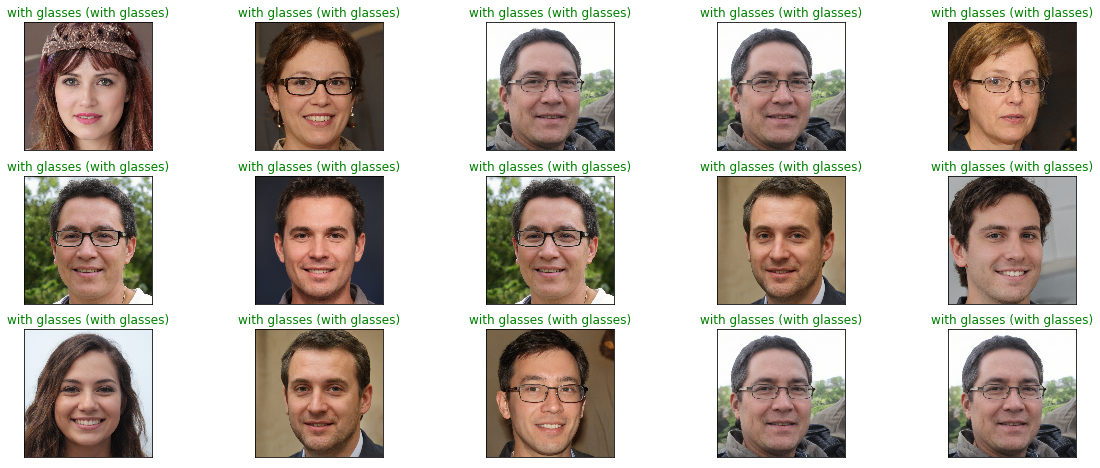

In [ ]:
labels =["with glasses",  
        "without glassess",     
        ]

y_hat = model3.predict(x_test)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=True)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
score = model3.evaluate(x_test, y_test)
print('Score:', score)

1/1 [==============================] - 1s 562ms/step - loss: 0.5789 - accuracy: 0.4545
Score: [0.5788524150848389, 0.4545454680919647]


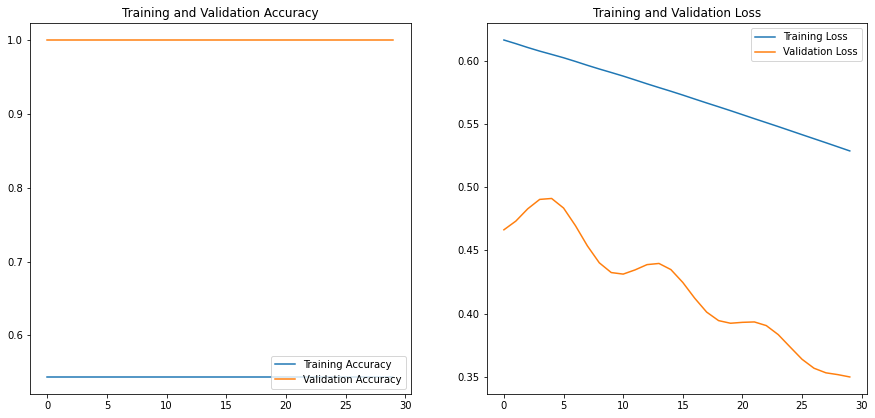

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#model 3